In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

from IPython.display import Image
from sklearn import tree
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoLarsCV
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error

warnings.filterwarnings('ignore')

**DATASET**

HR Analytics

https://www.kaggle.com/code/jacksonchou/hr-analytics/report

In [ ]:
df = pd.read_csv('/content/HR_comma_sep.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df['salary'] = df.salary.map({'low':0, 'medium':1, 'high':2})

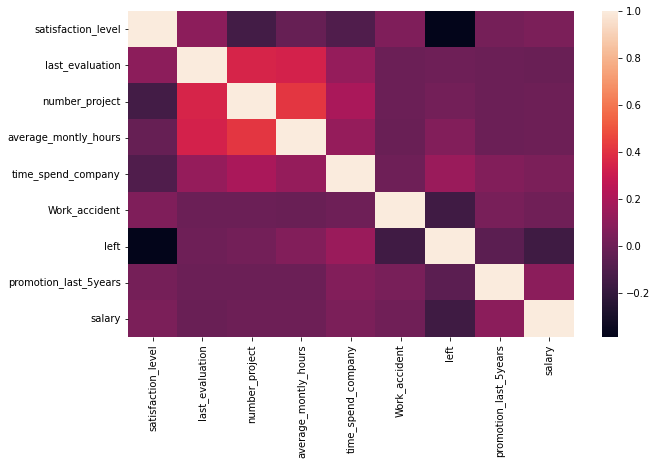

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

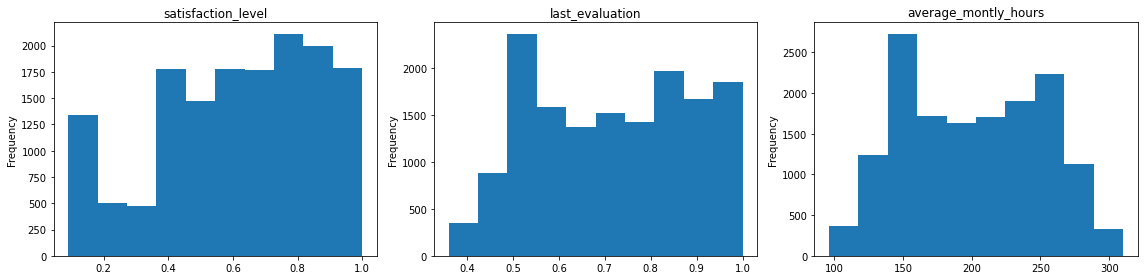

In [ ]:
cols = ['satisfaction_level', 'last_evaluation', 'average_montly_hours']

for i, j in enumerate(cols):
  plt.subplot(1, 3, i+1)
  df.loc[:,f'{j}'].plot.hist(figsize=(16,4), title=j)
  plt.xlabel('')
  plt.tight_layout()

In [ ]:
df[cols].skew()

satisfaction_level     -0.476360
last_evaluation        -0.026622
average_montly_hours    0.052842
dtype: float64

In [ ]:
# Split into training and testing sets for nonlinear models

X = df.drop(['left','sales'], axis=1).copy()
y = df.left.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=94)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10499, 8), (10499,), (4500, 8), (4500,))

#### **Decision Tree**

In [ ]:
# Build model
tree_class = DecisionTreeClassifier(max_depth=3, random_state=94)
tree_class.fit(X_train, y_train)
preds_tree = tree_class.predict(X_test)

In [ ]:
print(classification_report(y_test, preds_tree))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3446
           1       0.89      0.93      0.91      1054

    accuracy                           0.96      4500
   macro avg       0.93      0.95      0.94      4500
weighted avg       0.96      0.96      0.96      4500



In [ ]:
print(confusion_matrix(y_test, preds_tree))

[[3325  121]
 [  71  983]]


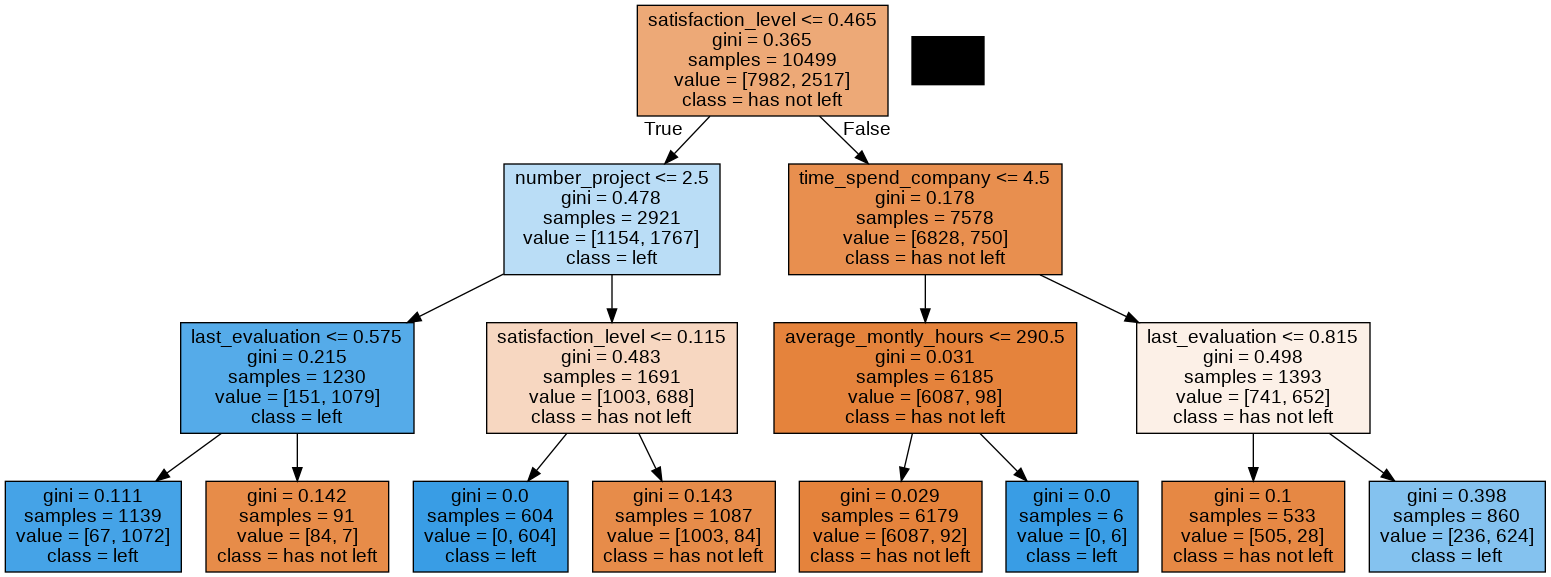

In [ ]:
# https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

fn=X_train.columns
cn=['has not left', 'left']
out = StringIO()
tree.export_graphviz(tree_class, out_file=out, filled=True, feature_names=fn, class_names=cn)
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

Decision tree analysis was performed to test nonlinear relationships among a series of explanatory variables and a binary, categorical response variable. All possible separations (categorical) or cut points (quantitative) are tested. For the present analyses, the entropy “goodness of split” criterion was used to grow the tree. The maximum tree depth level is 3.

The following explanatory variables were included as possible contributors to a classification tree model evaluating if a employee has left the company (my response variable), satisfaction level, last evaluation, number of projects, avergae monthly hours, time spend company, work accident, promotion last 5 years and salary.

The satisfaction level was the first variable to separate the sample into two subgroups. Employees with a satisfaction level smaller or equal than 0.465 were more likely to have not left the company compared to employees who did not meet this threshold.

Of the employees with satisfaction lever less than or equal to 0.465, a further subdivision was made with the discrete variable of number of projects. Employees who reported having 2 projects were more likely to have left the company. Employees with less than or equal to 4.5 time spent in the company were more likely to have left it.

Another branch interpretation, as we are not going to interpret all of them (work left for the reader), is when the satisfaction levels is less or equal than 0.465, the number of projects are more than 2.5 and ,finally, the satisfaction level is greater than 0.115. In this case, the employees were more likely to have stayed at the company.

The total model classified 96% of the sample correctly.

#### **Random Forest**

In [ ]:
# Build model
rf_tree_class = RandomForestClassifier(n_estimators=25, random_state=94)
rf_tree_class.fit(X_train, y_train)
preds_tree = rf_tree_class.predict(X_test)

In [ ]:
print(classification_report(y_test, preds_tree))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3446
           1       1.00      0.97      0.98      1054

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [ ]:
print(confusion_matrix(y_test, preds_tree))

[[3441    5]
 [  30 1024]]


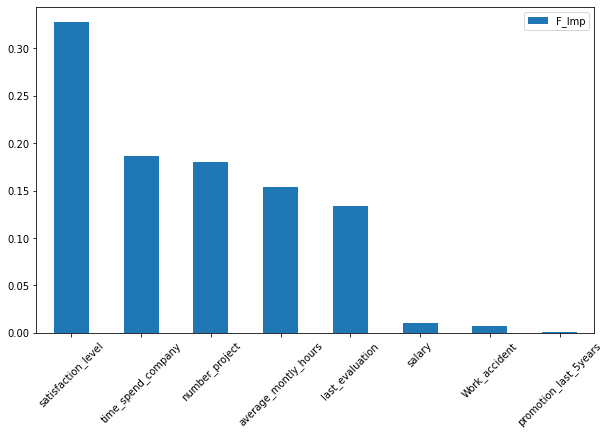

In [ ]:
pd.DataFrame(index=X_test.columns, data= list(rf_tree_class.feature_importances_),
             columns=['F_Imp']).sort_values(by='F_Imp', ascending=False).plot.bar(figsize=(10,6))
plt.xticks(rotation=45)
plt.show()

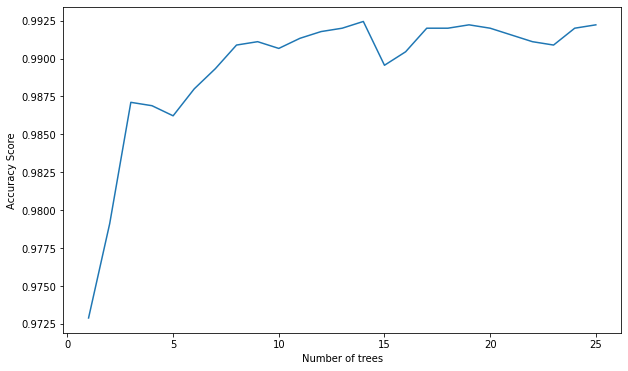

In [ ]:
trees = list(range(25))
accuracy=np.zeros(25)

for idx in trees:
   classifier=RandomForestClassifier(n_estimators=idx+1)
   classifier=classifier.fit(X_train, y_train)
   predictions=classifier.predict(X_test)
   accuracy[idx]=accuracy_score(y_test, predictions)
   
plt.figure(figsize=(10,6))
plt.plot([i+1 for i in trees], accuracy)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy Score')
plt.show()

Random forest analysis was performed to evaluate the importance of a series of explanatory variables in predicting a binary, categorical response variable.

The following explanatory variables were included as possible contributors to a classification tree model evaluating if a employee has left the company (my response variable), satisfaction level, last evaluation, number of projects, avergae monthly hours, time spend company, work accident, promotion last 5 years and salary.

The order of the relative importance scores, from highest to lowest, were: satisfaction level, time spend company, number projects, average monthly hours, last evaluation, salary (as categorical varible), work accident and promotion las 5 years. The accuracy on the test set of the random forest was 99%.

It is seen that after 9 trees the accuracy score starts stabilizing, indicating that it might not be necessary to increase the model complexity beyond that number of trees.

#### **Lasso Regression**

In [ ]:
# Split into training and testing sets

X = df.drop(['average_montly_hours','sales'], axis=1).copy()
y = df.average_montly_hours.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=94)

In [ ]:
# Preprocessing 
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
# Build model
model = LassoLarsCV(cv=10)
model.fit(scaled_X_train, y_train)

LassoLarsCV(cv=10)

In [ ]:
# print variable names and regression coefficients
g = dict(zip(X_train.columns, model.coef_))

sorted(g.items(), key=lambda x: x[1], reverse=True)

[('number_project', 16.703167152883605),
 ('last_evaluation', 10.54678191639814),
 ('left', 3.656197043999513),
 ('satisfaction_level', 1.6954833737079111),
 ('time_spend_company', 1.0974033792646696),
 ('salary', 0.5387139275324341),
 ('Work_accident', 0.4809897826078003),
 ('promotion_last_5years', 0.118089890847056)]

Text(0.5, 1.0, 'Regression Coefficients Progression for Lasso Paths')

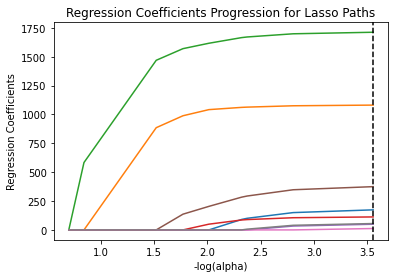

In [ ]:
# https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html

# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

Text(0.5, 1.0, 'Mean squared error on each fold')

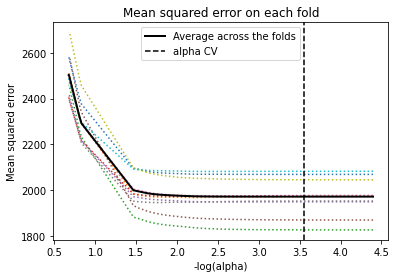

In [ ]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.mse_path_ , ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [ ]:
# MSE from training and test data
train_error = mean_squared_error(y_train, model.predict(scaled_X_train))
test_error = mean_squared_error(y_test, model.predict(scaled_X_test))
print ('Training data MSE:')
print(str(np.round(train_error, 4)) + '\n')
print ('Test data MSE:')
print(str(np.round(test_error, 4)))

Training data MSE:
1968.3593

Test data MSE:
1872.3936


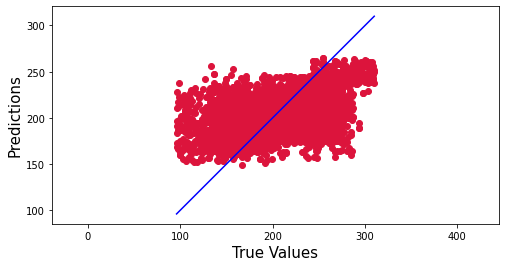

In [ ]:
preds = model.predict(scaled_X_test)

plt.figure(figsize=(8,4))
plt.scatter(y_test, preds, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(preds), max(y_test))
p2 = min(min(preds), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
# R-square from training and test data
rsquared_train = model.score(scaled_X_train, y_train)
rsquared_test = model.score(scaled_X_test, y_test)
print('Training data R-square:')
print(str(np.round(rsquared_train, 4)) + '\n')
print ('Test data R-square:')
print(np.round(rsquared_test, 4))

Training data R-square:
0.2136

Test data R-square:
0.2428


A lasso regression analysis was conducted to identify which variables from a pool of 8 categorical and quantitative predictor variables that best predicted a quantitative response variable measuring the average monthly hours of employees in a company.

Categorical predictors included 'left', 'work accident' and 'salary' (measured as low, medium and high). Quantitative predictor variables include 'number of projects', 'last evaluation', 'satisfaction level', 'time spend company' and 'promotion las 5 years'. All predictor variables were standardized to have a mean of zero and a standard deviation of one. Numerical continuous variables seem to be fairly symmetrical in the histograms and the skewness of all of them are between the range [-0.5, 0.5] so we did not have to do any transformation on the distribution of the data.

Data were randomly split into a training set that included 70% of the observations (N=10499) and a test set that included 30% of the observations (N=4500). The least angle regression algorithm with k=10 fold cross validation was used to estimate the lasso regression model in the training set, and the model was validated using the test set. Primarly, we have used the Lars algorithm to track the evolution of the coefficients and the error measured as MSE. In order to identify the best predictor variables, the change in the cross validation mean squared error at each step was used. 

All the predictor variables were retained in the selected model (at least with this numbers of features and iterations). After running Lasso regression, all independent variables were found to be positively correlated with the dependent variable. The ordinal importance of the features (from most important to least important) is shown below :

* 'number_project'

* 'last_evaluation'

* 'left'

* 'satisfaction_level'

* 'time_spend_company'

* 'salary'

* 'Work_accident'

* 'promotion_last_5years'

These 8 variables accounted for 24.28% of the variance in the 'average monthly hours' response variable. 

#### **K-Means Clustering**

In [ ]:
# Split into training and testing sets
X = df.drop(['left','sales'], axis=1).copy()
y = df.left.copy()

X_train, X_test = train_test_split(X, test_size=0.3, random_state=94)

In [ ]:
# Preprocessing 
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
# k-means cluster analysis for 1-9 clusters                                                           
clusters=range(1,10)
meandist=[]

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_X_train)
    meandist.append(sum(np.min(cdist(scaled_X_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / scaled_X_train.shape[0])

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

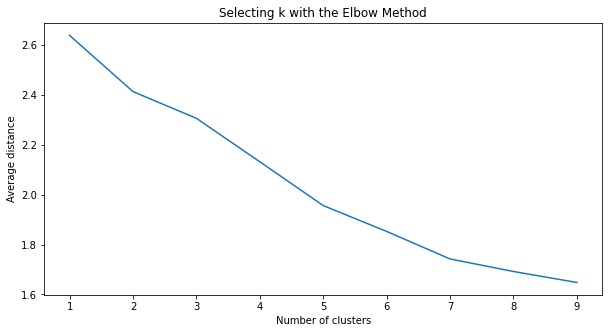

In [ ]:
# Plot average distance from observations from the cluster centroid
# to use the Elbow Method to identify number of clusters to choose
plt.figure(figsize=(10, 5))
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

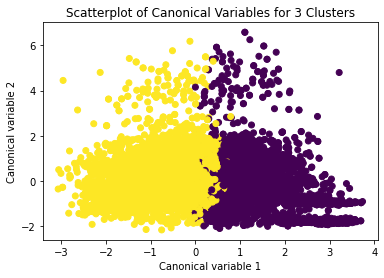

In [ ]:
# Interpret 2 cluster solution of K-Means clustering
model2 = KMeans(n_clusters=2)
model2.fit(scaled_X_train)

# plot clusters
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(scaled_X_train)
plt.scatter(x = plot_columns[:,0], y = plot_columns[:,1], c = model2.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

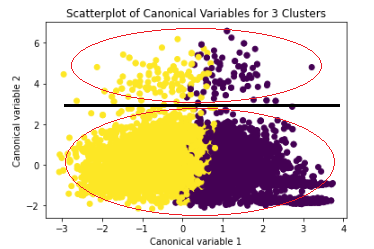

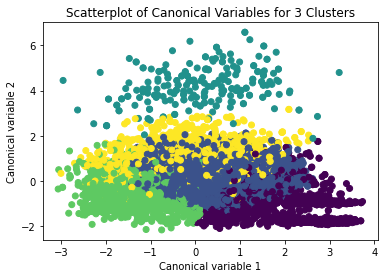

In [ ]:
# Interpret 5 cluster solution of K-Means clustering
model3 = KMeans(n_clusters=5)
model3.fit(scaled_X_train)

# plot clusters
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(scaled_X_train)
plt.scatter(x = plot_columns[:,0], y = plot_columns[:,1], c = model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

In [ ]:
# create a unique identifier variable for the 
# cluster training data to merge with the cluster assignment variable
clust_list = [i for i in range(len(scaled_X_train))]
# combine index variable list with cluster assignment list into a dictionary
new_list = dict(zip(clust_list, model3.labels_))
# convert newlist dictionary to a dataframe
newclus = pd.DataFrame().from_dict(new_list, orient='index')
# rename the cluster assignment column
newclus.columns = ['cluster']
# cluster frequencies
newclus.value_counts()

cluster
1          4837
3          2725
4          1405
0          1303
2           229
dtype: int64

In [ ]:
# validate clusters in training data by examining cluster differences in GPA using ANOVA
# first have to merge GPA with clustering variables and cluster assignment data 
sat_data = df.copy()
# split GPA data into train and test sets
sat_train, sat_test = train_test_split(sat_data, test_size=0.3, random_state=94)
sat_train1 = pd.DataFrame(sat_train)
sat_train1.reset_index(inplace=True, drop=True)
merged_train_all = newclus.join(sat_train1)

In [ ]:
gpamod = smf.ols(formula='satisfaction_level ~ C(cluster)', data=merged_train_all).fit()
print (gpamod.summary())

                            OLS Regression Results                            
Dep. Variable:     satisfaction_level   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     3244.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:15:08   Log-Likelihood:                 3931.2
No. Observations:               10499   AIC:                            -7852.
Df Residuals:                   10494   BIC:                            -7816.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2096      0.005     

In [ ]:
print ('Means by cluster')
m1= merged_train_all.groupby('cluster').mean()
m1

Means for satisfaction level by cluster


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
cluster,,,,,,,,,
0,0.209570,0.805426,5.495012,246.115119,4.705295,0.027629,0.511128,0.0,0.561013
1,0.766018,0.788009,3.936944,214.130453,3.356419,0.000000,0.142444,0.0,0.618772
2,0.658210,0.702140,3.799127,200.659389,4.109170,0.244541,0.052402,1.0,1.021834
3,0.508745,0.552466,2.793394,157.281835,3.128807,0.000000,0.388624,0.0,0.520367
4,0.666925,0.703843,3.697509,197.656228,3.432740,1.000000,0.064769,0.0,0.592171


In [ ]:
print ('Standard deviations by cluster')
m2= merged_train_all.groupby('cluster').std()
m2

Standard deviations for satisfaction level by cluster


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
cluster,,,,,,,,,
0,0.160509,0.137299,1.099406,45.521021,1.629423,0.163969,0.500068,0.0,0.630083
1,0.144213,0.146796,0.880090,41.905085,1.330399,0.000000,0.349541,0.0,0.637441
2,0.218798,0.168823,1.052899,47.620366,2.077734,0.430757,0.223324,0.0,0.645126
3,0.170408,0.100537,0.938780,32.105333,1.038147,0.000000,0.487527,0.0,0.607140
4,0.217739,0.164588,1.012191,46.649470,1.630132,0.000000,0.246205,0.0,0.637902


In [ ]:
mc1 = multi.MultiComparison(merged_train_all['satisfaction_level'], merged_train_all['cluster'])
# Tukey's range test to compare means of all pairs of groups
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   0.5564 0.001  0.5423  0.5706   True
     0      2   0.4486 0.001  0.4161  0.4812   True
     0      3   0.2992 0.001  0.2839  0.3145   True
     0      4   0.4574 0.001  0.4399  0.4748   True
     1      2  -0.1078 0.001 -0.1385 -0.0771   True
     1      3  -0.2573 0.001 -0.2681 -0.2464   True
     1      4  -0.0991 0.001 -0.1129 -0.0853   True
     2      3  -0.1495 0.001 -0.1807 -0.1182   True
     2      4   0.0087   0.9 -0.0236  0.0411  False
     3      4   0.1582 0.001  0.1433  0.1731   True
---------------------------------------------------


A k-means cluster analysis was conducted to identify underlying subgroups of employees based on their similarity of responses on 8 variables that represent characteristics that could have an impact on the probability to leave the company/quit their jobs. Categorical predictors included 'work accident' and 'salary' (measured as low, medium and high). Quantitative predictor variables include 'number of projects', 'last evaluation', 'satisfaction level', 'avergae monthly hours', 'time spend company' and 'promotion las 5 years'. All predictor variables were standardized to have a mean of zero and a standard deviation of one. Numerical continuous variables seem to be fairly symmetrical in the histograms and the skewness of all of them are between the range [-0.5, 0.5] so we did not have to do any transformation on the distribution of the data.

Data were randomly split into a training set that included 70% of the observations (N=10499) and a test set that included 30% of the observations (N=4500). A series of k-means cluster analyses were conducted on the training data specifying k=1-9 clusters, using Euclidean distance. The variance in the clustering variables that was accounted for by the clusters was plotted for each of the nine cluster solutions in an elbow curve to provide guidance for choosing the number of clusters to interpret.  

The elbow curve was inconclusive, suggesting that the 2, 5 and 7-cluster solutions might be interpreted. The results below are for an interpretation of the 5-cluster solution. 

PCA was used to reduce the 8 initial features of the dataset to a few variables that accounted for most of the variance in the variables. A scatterplot is used to display the clusters resulting from the linear combination of the 8 initial features. What this shows is that there are 4 clusters densely packed/grouped, meaning that the observations within the clusters are highly correlated with each other, and that the within cluster variance is relatively low. The 4 clusters, located in the mayor cloud of dots at the bottom of the chart, appear to be overlapped, meaning that there is no good separation between these clusters. The cluster located in the upper point cloud shows better separation, but the observations are more spread out indicating less correlation among the observations and higher within cluster variance.

Eventhough we have the right number of clusters of the dataset beacuse of the binary response variable (has or has not left the company), the k-means clustering algorithm have failed to recover them. This might be because, as each cluster is defined solely by its center, the algorithm can capture relatively simple shapes, in other words, it assumes each cluster has a convex shape. It also assumes that all clusters have the same diameter is some way; the boundaries between clusters are drawn in the middle between cluster centroids/centers. Another assumption is that all directions are equally important for each cluster. As a result of all the previous assumptions just mentioned, k-means can perform poorly if the clusters have complex shapes. 

Cluster 0 has the lowest satisfaction level and higher last evaluation along with number of projects, average monthly hours, time spend company and rate of leaving the company ('left'). The observations in this group most likely belong to employees who have quit their jobs. Clusters 2 and 4 seem to be very similar at almost all the features, with exception in 'time spend company', 'promotion last 5 years' and 'salary' (when comparing 'work accident' of cluster 4 against all the other ones, cluster 2 is the most similar as the difference is the smallest one). It may be that the difference between the observations of cluster 2 and 4 lies in that the employees who belong to cluster 2 had a promotion in the company and therefore have higher wages and that they had much fewer accidents at work in comparison to cluster 4, in which all observations had an accident. Both clusters have the lower quit rate. Employees of cluster 4 have the higher wages among all clusters. The cluster 1 has the higher satisfaction level among all clusters. Observations in cluster 1 have the highest satisfaction level in the sample. Although they have relatively high 'last evaluation', 'number project' and 'average monthly hours', the 'time spend company' is almost the lowest between al clusters and the 'salary' is relatively high. Perhaps the reason is that they are highly educated as there are many studies that shows that returns to education have a positive relationship.

OLS results indicated significant differences between the clusters on satisfaction level (Prob (F-statistic) < 0.05), this means that the overall model is statistically significant since the probability of having a zero value for all the coefficientes is 0. Each cluster in the model seems to be statistically significant as the p-value for each one is p < 0.05. The tukey post hoc comparisons showed significant differences between clusters on satisfaction level, with the exception that clusters 2 and 4 were not significantly different from each other. Employees in cluster 0 had the highest satisfaction level (mean=0.766, sd=0.144), and cluster 0 had the lowest satisfaction level (mean=0.21, sd=0.16).
